In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datasets/8segment_csv.csv')
df.head()


Mounted at /content/drive


,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,path
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,foliage
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,sky
3,32,173,9,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,path
4,61,197,9,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,path


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()
# columns = df.columns
# df[columns] = df[columns].apply(LabelEncoder().fit_transform)
# df.head

<bound method NDFrame.head of       region-centroid-col  region-centroid-row  region-pixel-count  \
0                     217                  167                   0   
1                     112                  119                   0   
2                     201                   30                   0   
3                      31                  162                   0   
4                      60                  186                   0   
...                   ...                  ...                 ...   
2305                   29                   91                   0   
2306                  142                   13                   0   
2307                   79                   61                   0   
2308                   97                  122                   0   
2309                   18                  136                   0   

      short-line-density-5  short-line-density-2  vedge-mean  vegde-sd  \
0                        1                     0       

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp = imp.fit(df)
# df = imp.transform(df)
# df = pd.DataFrame(df, columns = columns)
# print(df)

NameError: ignored

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
y_test = df_test.iloc[:, -1:]

In [ ]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(0.8440810381355932, 0.9705882352941176, 'x[16] <= 101.778\ngini = 0.857\nsamples = 1547\nvalue = [232, 220, 207, 223, 221, 234, 210]'),
 Text(0.8271318855932204, 0.9117647058823529, 'x[15] <= 3.444\ngini = 0.833\nsamples = 1313\nvalue = [232, 220, 207, 223, 221, 0, 210]'),
 Text(0.8101827330508474, 0.8529411764705882, 'x[1] <= 159.5\ngini = 0.8\nsamples = 1092\nvalue = [232, 220, 207, 2, 221, 0, 210]'),
 Text(0.6542637711864406, 0.7941176470588235, 'x[10] <= 24.833\ngini = 0.751\nsamples = 866\nvalue = [232, 215, 207, 0, 2, 0, 210]'),
 Text(0.4525953389830508, 0.7352941176470589, 'x[18] <= -1.851\ngini = 0.692\nsamples = 662\nvalue = [231, 30, 193, 0, 0, 0, 208]'),
 Text(0.18485169491525424, 0.6764705882352942, 'x[18] <= -2.229\ngini = 0.579\nsamples = 387\nvalue = [5, 30, 185, 0, 0, 0, 167]'),
 Text(0.05084745762711865, 0.6176470588235294, 'x[1] <= 146.5\ngini = 0.069\nsamples = 113\nvalue = [0, 3, 109, 0, 0, 0, 1]'),
 Text(0.03389830508474576, 0.5588235294117647, 'x[12] <= 26.6

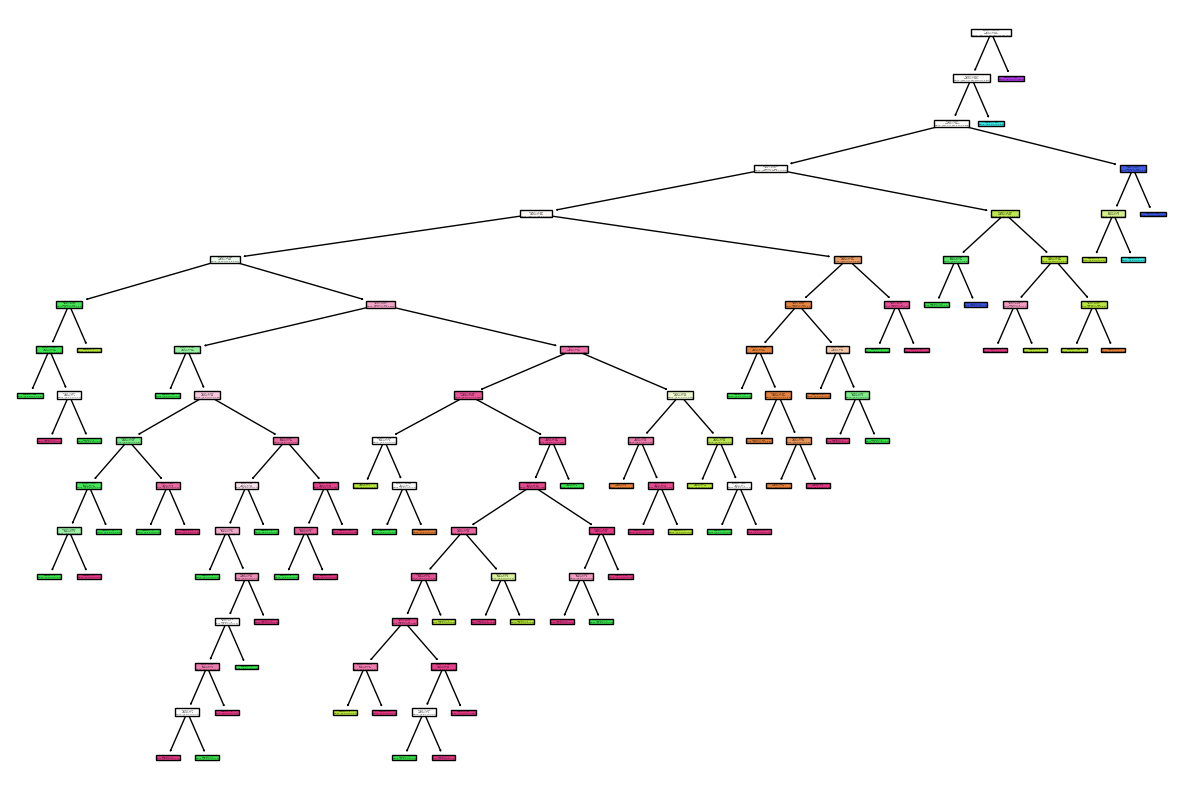

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred,y_test):.6f}')

accuracy: 0.954128


# Default Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

   brickface       0.99      1.00      0.99        97
      cement       0.95      0.94      0.94       111
     foliage       0.90      0.92      0.91       121
       grass       1.00      0.99      1.00       108
        path       0.99      1.00      1.00       108
         sky       1.00      1.00      1.00        96
      window       0.88      0.86      0.87       122

    accuracy                           0.95       763
   macro avg       0.96      0.96      0.96       763
weighted avg       0.95      0.95      0.95       763



In [ ]:
treemodel_post_pruning = DecisionTreeClassifier(max_depth=15)
treemodel_post_pruning.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
treemodel_post_pruning.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=15)

[Text(0.8412181712962963, 0.96875, 'x[11] <= 101.778\ngini = 0.857\nsamples = 1547\nvalue = [232, 220, 207, 223, 221, 234, 210]'),
 Text(0.8226996527777778, 0.90625, 'x[15] <= 3.444\ngini = 0.833\nsamples = 1313\nvalue = [232, 220, 207, 223, 221, 0, 210]'),
 Text(0.8041811342592593, 0.84375, 'x[1] <= 159.5\ngini = 0.8\nsamples = 1092\nvalue = [232, 220, 207, 2, 221, 0, 210]'),
 Text(0.6453993055555556, 0.78125, 'x[10] <= 24.833\ngini = 0.751\nsamples = 866\nvalue = [232, 215, 207, 0, 2, 0, 210]'),
 Text(0.44820601851851855, 0.71875, 'x[18] <= -1.851\ngini = 0.692\nsamples = 662\nvalue = [231, 30, 193, 0, 0, 0, 208]'),
 Text(0.2019675925925926, 0.65625, 'x[18] <= -2.229\ngini = 0.579\nsamples = 387\nvalue = [5, 30, 185, 0, 0, 0, 167]'),
 Text(0.05555555555555555, 0.59375, 'x[1] <= 146.5\ngini = 0.069\nsamples = 113\nvalue = [0, 3, 109, 0, 0, 0, 1]'),
 Text(0.037037037037037035, 0.53125, 'x[9] <= 31.315\ngini = 0.018\nsamples = 110\nvalue = [0, 0, 109, 0, 0, 0, 1]'),
 Text(0.018518518518

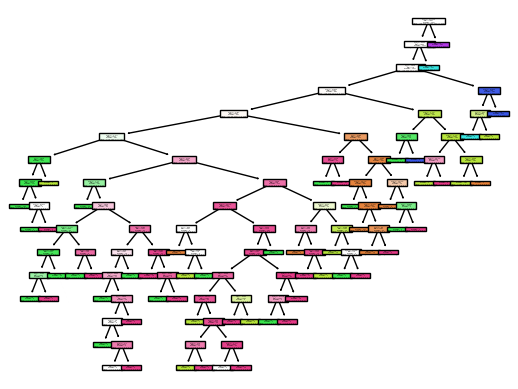

In [ ]:
tree.plot_tree(treemodel_post_pruning,filled=True)


In [ ]:
y_pred_post_pruning =treemodel_post_pruning.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_post_pruning,y_test):.6f}')


accuracy: 0.946265


# Post Pruning Deciciotn Tree Reports

In [ ]:
print(classification_report(y_pred_post_pruning,y_test))

              precision    recall  f1-score   support

   brickface       0.99      0.98      0.98        99
      cement       0.95      0.94      0.94       111
     foliage       0.88      0.89      0.89       121
       grass       0.99      1.00      1.00       106
        path       1.00      0.99      1.00       110
         sky       1.00      1.00      1.00        96
      window       0.85      0.85      0.85       120

    accuracy                           0.95       763
   macro avg       0.95      0.95      0.95       763
weighted avg       0.95      0.95      0.95       763



In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13, 15, 16],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel_pre_pruninig=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_pre_pruninig,param_grid=parameter,cv=5,scoring='accuracy')


In [ ]:
cv.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 15, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
y_pred_pre_pruning=cv.predict(X_test)


In [ ]:
print(f'accuracy: {accuracy_score(y_pred_pre_pruning,y_test):.6f}')

accuracy: 0.950197


# PrePruning Decision Tree Report

In [ ]:
print(classification_report(y_pred_pre_pruning,y_test))


              precision    recall  f1-score   support

   brickface       0.97      0.97      0.97        98
      cement       0.93      0.95      0.94       107
     foliage       0.96      0.87      0.91       135
       grass       0.99      0.99      0.99       107
        path       0.98      0.99      0.99       108
         sky       1.00      1.00      1.00        96
      window       0.84      0.90      0.87       112

    accuracy                           0.95       763
   macro avg       0.95      0.95      0.95       763
weighted avg       0.95      0.95      0.95       763



In [ ]:
treemodel_cost_complexity=DecisionTreeClassifier()
path = treemodel_cost_complexity.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
ccp_alphas

array([0.        , 0.00048481, 0.00060601, 0.00061563, 0.00062556,
       0.00063853, 0.00064054, 0.00064641, 0.00077374, 0.00086188,
       0.00088599, 0.00096962, 0.00103426, 0.00118509, 0.00128584,
       0.00129282, 0.00153199, 0.00166046, 0.00168262, 0.00169876,
       0.00172377, 0.0017785 , 0.00184689, 0.00200576, 0.00226244,
       0.00267876, 0.00286576, 0.00346582, 0.0037415 , 0.00405024,
       0.00466678, 0.00518871, 0.00623298, 0.00697978, 0.00786883,
       0.01083152, 0.01667741, 0.0258404 , 0.03885868, 0.04314161,
       0.09785503, 0.10111375, 0.13595189, 0.14209174, 0.14980845])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.14980844994861253


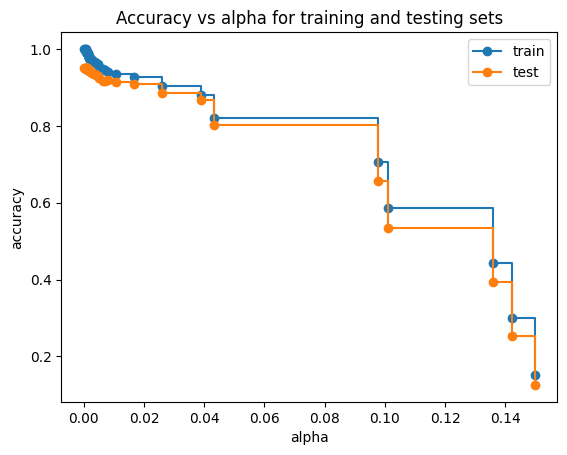

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
treemodel_cost_complexity = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00)
treemodel_cost_complexity.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.8412181712962963, 0.9705882352941176, 'x[16] <= 101.778\ngini = 0.857\nsamples = 1547\nvalue = [232, 220, 207, 223, 221, 234, 210]'),
 Text(0.8226996527777778, 0.9117647058823529, 'x[18] <= 0.644\ngini = 0.833\nsamples = 1313\nvalue = [232, 220, 207, 223, 221, 0, 210]'),
 Text(0.8041811342592593, 0.8529411764705882, 'x[1] <= 159.5\ngini = 0.8\nsamples = 1092\nvalue = [232, 220, 207, 2, 221, 0, 210]'),
 Text(0.6453993055555556, 0.7941176470588235, 'x[10] <= 24.833\ngini = 0.751\nsamples = 866\nvalue = [232, 215, 207, 0, 2, 0, 210]'),
 Text(0.44820601851851855, 0.7352941176470589, 'x[18] <= -1.851\ngini = 0.692\nsamples = 662\nvalue = [231, 30, 193, 0, 0, 0, 208]'),
 Text(0.2019675925925926, 0.6764705882352942, 'x[18] <= -2.229\ngini = 0.579\nsamples = 387\nvalue = [5, 30, 185, 0, 0, 0, 167]'),
 Text(0.05555555555555555, 0.6176470588235294, 'x[1] <= 146.5\ngini = 0.069\nsamples = 113\nvalue = [0, 3, 109, 0, 0, 0, 1]'),
 Text(0.037037037037037035, 0.5588235294117647, 'x[9] <= 31.3

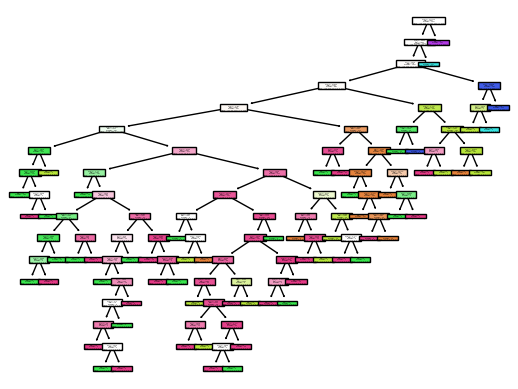

In [ ]:
tree.plot_tree(treemodel_cost_complexity,filled=True)

In [ ]:
y_pred_cost_complexity=treemodel_cost_complexity.predict(X_test)

In [ ]:
print(f'accuracy: {accuracy_score(y_pred_cost_complexity,y_test):.6f}')


accuracy: 0.950197


# Cost Complexity Decision Tree Report

In [ ]:
print(classification_report(y_pred_cost_complexity,y_test))

              precision    recall  f1-score   support

   brickface       0.97      1.00      0.98        95
      cement       0.95      0.96      0.95       108
     foliage       0.88      0.92      0.90       118
       grass       1.00      0.99      1.00       108
        path       0.99      1.00      1.00       108
         sky       1.00      1.00      1.00        96
      window       0.89      0.82      0.86       130

    accuracy                           0.95       763
   macro avg       0.95      0.96      0.95       763
weighted avg       0.95      0.95      0.95       763



In [ ]:
pip install chefboost

In [ ]:
from chefboost.training import Training

def findGain(threshold, d, column):
  idx = d[d[column] <= threshold].index
  tmp_d = d.copy()
  tmp_d[column] = '>' + str(threshold)
  tmp_d.loc[idx, column] = '<=' + str(threshold)
  config = {'algorithm': 'CART'}
  gain = Training.findGains(tmp_d, config)['gains'][column]
  return gain

In [ ]:
def change_to_class(columns, decision):
  binary_selection = {}
  for column in columns:
    df_temp = df_train.copy()
    df_temp = df_temp[[column, decision]]
    df_temp.rename(columns={decision : "Decision"}, inplace=True)
    uniques_values = sorted(df_temp[column].unique())
    theresold, mx_gain = 0, 1
    for i in uniques_values:
      gain = findGain(i, df_temp, column)
      if (mx_gain > gain):
        theresold = i
        mx_gain = gain
    binary_selection[column] = theresold
  return binary_selection
    # idx = classified_df[classified_df[column] <= mx_theresold].index
    # classified_df[column] = '>' + str(mx_theresold)
    # classified_df.loc[idx, column] = '<=' + str(mx_theresold)

In [ ]:
print(df_train)

      region-centroid-col  region-centroid-row  region-pixel-count  \
572                   237                  137                   9   
1014                  115                   75                   9   
1995                  145                   90                   9   
2094                   73                   31                   9   
1047                  118                   21                   9   
...                   ...                  ...                 ...   
1638                   75                  131                   9   
1095                   89                   89                   9   
1130                  202                   71                   9   
1294                  158                  154                   9   
860                    23                  188                   9   

      short-line-density-5  short-line-density-2  vedge-mean  vegde-sd  \
572                    0.0                   0.0    0.388889  0.107407   
1014       

In [ ]:
numerical_features = df.columns.values[:-1]
print(numerical_features)
binary_selection = change_to_class(numerical_features, 'class')
print(binary_selection)

['region-centroid-col' 'region-centroid-row' 'region-pixel-count'
 'short-line-density-5' 'short-line-density-2' 'vedge-mean' 'vegde-sd'
 'hedge-mean' 'hedge-sd' 'intensity-mean' 'rawred-mean' 'rawblue-mean'
 'rawgreen-mean' 'exred-mean' 'exblue-mean' 'exgreen-mean' 'value-mean'
 'saturation-mean' 'hue-mean']
{'region-centroid-col': 151, 'region-centroid-row': 159, 'region-pixel-count': 9, 'short-line-density-5': 0.0, 'short-line-density-2': 0.0, 'vedge-mean': 1.27778, 'vegde-sd': 0.827758, 'hedge-mean': 1.88889, 'hedge-sd': 1.06806, 'intensity-mean': 79.6667, 'rawred-mean': 63.8889, 'rawblue-mean': 91.4444, 'rawgreen-mean': 66.4444, 'exred-mean': -27.4444, 'exblue-mean': -0.222222, 'exgreen-mean': 3.0, 'value-mean': 91.4444, 'saturation-mean': 0.362172, 'hue-mean': 0.0}


In [ ]:
class SelectRootDecisionTree():
  def __init__(self, criterion = "gini", max_depth = 20):
    self.criterion = criterion
    self.max_depth = max_depth

  def fit(self, X):
    self.X = X.copy();

  def predict(self, X_test):
    X_sub = {}
    DT_set = {}
    for feature in self.X.columns[0: -1]:
      X_sub[feature] = {}
      DT_set[feature] = {}
      if feature in numerical_features:
        X_sub[feature][0] = self.X[self.X[feature] < binary_selection[feature]].drop([feature], axis=1)
        X_sub[feature][1] = self.X[self.X[feature] >= binary_selection[feature]].drop([feature], axis=1)

        if 0 in list(X_sub[feature].keys()):
          if not X_sub[feature][0].empty:
            DT_set[feature][0] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][0].iloc[:,-1:]
            X_temp = X_sub[feature][0].iloc[:,:-1]
            DT_set[feature][0] = DT_set[feature][0].fit(X_temp, Y_Sub)
        if 1 in list(X_sub[feature].keys()):
          if not X_sub[feature][1].empty:
            DT_set[feature][1] = DecisionTreeClassifier(max_depth = self.max_depth)
            Y_Sub = X_sub[feature][1].iloc[:,-1:]
            X_temp = X_sub[feature][1].iloc[:,:-1]
            DT_set[feature][1] = DT_set[feature][1].fit(X_temp, Y_Sub)
      else:
        for label in np.unique(self.X[feature].values):
          X_sub[feature][label] = self.X[self.X[feature].eq(label)].drop([feature], axis=1)
          DT_set[feature][label] = DecisionTreeClassifier(max_depth = self.max_depth)
          Y_Sub = X_sub[feature][label].iloc[:,-1:]
          X_temp = X_sub[feature][label].iloc[:,:-1]
          DT_set[feature][label] = DT_set[feature][label].fit(X_temp, Y_Sub)

    predictions = []
    target = self.X.columns[-1:][0]
    # res = DT_set['Outlook'][1].predict(pd.DataFrame([row[1]],columns=X_test.columns).drop(['Outlook'], axis=1))

    for feature in X_test.columns:
      prediction = []
      for row in X_test.iterrows():
        label = row[1][feature]
        if feature in numerical_features:
          label = 1 if row[1][feature] >= binary_selection[feature] else 0
        if label not in list(X_sub[feature].keys()) or X_sub[feature][label].empty:
          prediction.append(0)
          continue;
        decisions = np.unique(X_sub[feature][label][target].values);
        if (len(decisions) == 1):
          prediction.append(decisions[0]);
          continue
        test_data = pd.DataFrame([row[1]],columns=X_test.columns).drop([feature], axis=1)
        res = DT_set[feature][label].predict(test_data)
        prediction.append(res[0])
      predictions.append(prediction)
    return predictions;
        # prediction.append()



In [ ]:
proposed_algo_1_dt = SelectRootDecisionTree(max_depth = 3)
proposed_algo_1_dt.fit(df_train)
print(X_test)
y_pred_proposed_algo_1 = proposed_algo_1_dt.predict(X_test)
print(y_pred_proposed_algo_1)

      region-centroid-col  region-centroid-row  region-pixel-count  \
1644                   64                   74                   9   
509                   216                   17                   9   
1410                  242                  183                   9   
44                    118                  125                   9   
1584                  217                   45                   9   
...                   ...                  ...                 ...   
1709                  118                  109                   9   
1338                   47                   96                   9   
1298                  139                   86                   9   
2229                  252                  137                   9   
2091                  162                   94                   9   

      short-line-density-5  short-line-density-2  vedge-mean   vegde-sd  \
1644              0.000000              0.000000    1.333330   0.577777   
509      

In [ ]:
from sklearn.metrics import recall_score
mx_recal, proposed_algo_result = 0, []
for feature_pred in y_pred_proposed_algo_1:
  # print(y_test_proposed_algo_1)
  recall = recall_score(feature_pred, y_test, average='macro')
  if (recall > mx_recal):
    proposed_algo_result = feature_pred
    mx_recal = recall
print(mx_recal)

0.92889853926626


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

In [ ]:
print(f'accuracy: {accuracy_score(proposed_algo_result, y_test):.6f}')

accuracy: 0.891219


In [ ]:
print(classification_report(proposed_algo_result, y_test))

              precision    recall  f1-score   support

   brickface       0.96      0.97      0.96        97
      cement       0.81      0.99      0.89        90
     foliage       0.58      0.97      0.72        73
       grass       1.00      0.96      0.98       111
        path       0.98      0.99      0.99       108
         sky       1.00      1.00      1.00        96
      window       0.97      0.62      0.75       188

    accuracy                           0.89       763
   macro avg       0.90      0.93      0.90       763
weighted avg       0.92      0.89      0.89       763

